<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

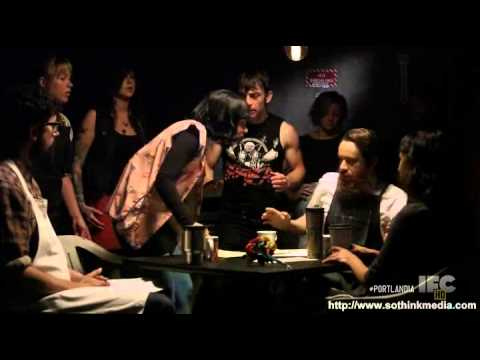

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/amybeisel/Code_Here/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [59]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [4]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
#looking at row 3 of the 'full_review_text'
shops['full_review_text'][3]


' 11/25/2016 Very cool decor! Good drinks Nice seating  However...  Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd.  Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average.  It feels like a Los Angeles coffee shot that is out of place. '

In [6]:
#get the date and reviews in seperate columns from 'full_review_text'
reviews = shops['full_review_text'].str.split(" ",n=2, expand = True)
reviews.head()

,0,1,2
0,,11/25/2016,1 check-in Love love loved the atmosphere! Eve...
1,,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...
3,,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,,12/3/2016,1 check-in They are located within the Northcr...


In [7]:
#retitle the the 1 and 2 with date_of_review, and full_review_text
#drop the full_review_text column
shops['date_of_review'] = reviews[1]
shops['text_review'] = reviews[2]
shops.drop(columns = 'full_review_text', inplace = True)

shops.head()

,coffee_shop_name,star_rating,date_of_review,text_review
0,The Factory - Cafe With a Soul,5.0 star rating,11/25/2016,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,4.0 star rating,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,4.0 star rating,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,2.0 star rating,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,4.0 star rating,12/3/2016,1 check-in They are located within the Northcr...


In [8]:
#dtype for date
shops['date_of_review'].dtypes

dtype('O')

In [9]:
#date_of_review os 'o', lets convert that to datetime 
pd.to_datetime(shops['date_of_review'], format='%m/%d/%Y')

0      2016-11-25
1      2016-12-02
2      2016-11-30
3      2016-11-25
4      2016-12-03
          ...    
7611   2015-02-19
7612   2016-01-21
7613   2015-04-30
7614   2015-08-02
7615   2015-05-23
Name: date_of_review, Length: 7616, dtype: datetime64[ns]

In [10]:
dir('star_rating')

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [11]:
#Remove text from 'star_rating'
shops['star_rating'] = shops['star_rating'].str.replace(r"[a-zA-Z]",'')
shops["star_rating"].head()

0     5.0   
1     4.0   
2     4.0   
3     2.0   
4     4.0   
Name: star_rating, dtype: object

In [12]:
#convert values from string to float
shops["star_rating"] = shops['star_rating'].astype(float)
shops['star_rating'].dtypes

dtype('float64')

In [13]:
#make sure everything above worked
shops.head()

,coffee_shop_name,star_rating,date_of_review,text_review
0,The Factory - Cafe With a Soul,5.0,11/25/2016,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,4.0,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,4.0,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,2.0,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,4.0,12/3/2016,1 check-in They are located within the Northcr...


In [14]:
#I just want to see how many different coffee shops were in this.
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Venezia Italian Gelato                  200
Houndstooth Coffee                      200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [15]:
#star_rating counts
shops['star_rating'].value_counts()

5.0    3780
4.0    2360
3.0     738
2.0     460
1.0     278
Name: star_rating, dtype: int64

In [16]:
#why is this not giving me values_counts??  Lecture - it worked for Bruno. 
shops['text_review'].value_counts()[:10]

1 check-in I love the deco a lot, it's a really good place to chill, it's modern, unique and appreciate the aesthetics, so I give that 5 stars, but the coffee was really disappointing. I ordered a coffee and it was a lot smaller than the picture on the menu and it was really expensive. It didn't taste good either. Other than there being no outlets and expensive coffee, this place is great.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [17]:
#define a fuction to parse the strings into a list of words
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [18]:
#Tokenize the 'text_review'
#create a new column with base_tokens
shops['base_tokens'] = shops['text_review'].apply(tokenize)
shops['base_tokens'].head()

0    [1, checkin, love, love, loved, the, atmospher...
1    [listed, in, date, night, austin, ambiance, in...
2    [1, checkin, listed, in, brunch, spots, i, lov...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [1, checkin, they, are, located, within, the, ...
Name: base_tokens, dtype: object

In [19]:
#take a look at the first 10 rows 'text_review' and 'base_tokens'
shops[['text_review', 'base_tokens']][:10]

,text_review,base_tokens
0,1 check-in Love love loved the atmosphere! Eve...,"[1, checkin, love, love, loved, the, atmospher..."
1,"Listed in Date Night: Austin, Ambiance in Aust...","[listed, in, date, night, austin, ambiance, in..."
2,1 check-in Listed in Brunch Spots I loved the ...,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,Very cool decor! Good drinks Nice seating How...,"[very, cool, decor, good, drinks, nice, seatin..."
4,1 check-in They are located within the Northcr...,"[1, checkin, they, are, located, within, the, ..."
5,1 check-in Very cute cafe! I think from the mo...,"[1, checkin, very, cute, cafe, i, think, from,..."
6,"2 check-ins Listed in ""Nuptial Coffee Bliss!"",...","[2, checkins, listed, in, nuptial, coffee, bli..."
7,2 check-ins Love this place! 5 stars for clea...,"[2, checkins, love, this, place, 5, stars, for..."
8,"1 check-in Ok, let's try this approach... Pro...","[1, checkin, ok, lets, try, this, approach, pr..."
9,3 check-ins This place has been shown on my so...,"[3, checkins, this, place, has, been, shown, o..."


In [20]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['base_tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [21]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts of words in the document set.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [22]:
# Use the Function
wc = count(shops['base_tokens'])
print(wc.shape)
wc.head()

(20530, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
40,the,6847,34809,1.0,0.044975,0.044975,0.899028
34,and,6864,26650,2.0,0.034433,0.079408,0.901261
44,a,6246,22755,3.0,0.029401,0.108809,0.820116
39,i,5528,20237,4.0,0.026147,0.134957,0.725840
3,to,5653,17164,5.0,0.022177,0.157133,0.742253


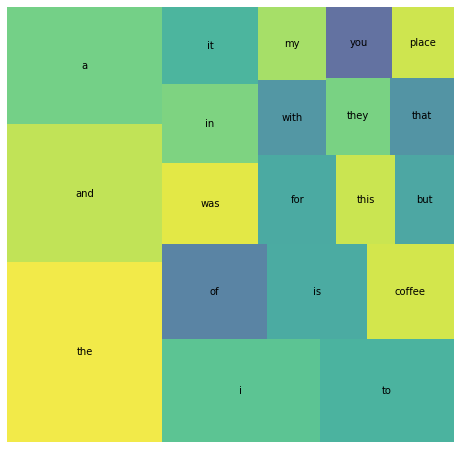

In [23]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [24]:
# Inialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [25]:
# Make them tokens using the Tokenizer Pipe
tokens = []
for doc in tokenizer.pipe(shops['text_review'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['spaCy_tokens'] = tokens
shops['spaCy_tokens'].head()

0    [1, check-in, Love, love, loved, the, atmosphe...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [1, check-in, Listed, in, Brunch, Spots, I, lo...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [1, check-in, They, are, located, within, the,...
Name: spaCy_tokens, dtype: object

In [26]:
#count
wc = count(shops['spaCy_tokens'])
print(wc.shape)
wc.head()

(44566, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
41,the,6520,27779,1.0,0.034993,0.034993,0.856092
35,and,6804,25748,2.0,0.032434,0.067427,0.893382
46,a,6181,22085,3.0,0.027820,0.095247,0.811581
58,I,5469,19780,4.0,0.024916,0.120163,0.718093
4,to,5631,16904,5.0,0.021294,0.141457,0.739364


In [27]:
shops.head()

,coffee_shop_name,star_rating,date_of_review,text_review,base_tokens,spaCy_tokens
0,The Factory - Cafe With a Soul,5.0,11/25/2016,1 check-in Love love loved the atmosphere! Eve...,"[1, checkin, love, love, loved, the, atmospher...","[1, check-in, Love, love, loved, the, atmosphe..."
1,The Factory - Cafe With a Soul,4.0,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...","[listed, in, date, night, austin, ambiance, in...","[Listed, in, Date, Night:, Austin,, Ambiance, ..."
2,The Factory - Cafe With a Soul,4.0,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, check-in, Listed, in, Brunch, Spots, I, lo..."
3,The Factory - Cafe With a Soul,2.0,11/25/2016,Very cool decor! Good drinks Nice seating How...,"[very, cool, decor, good, drinks, nice, seatin...","[Very, cool, decor!, Good, drinks, Nice, seati..."
4,The Factory - Cafe With a Soul,4.0,12/3/2016,1 check-in They are located within the Northcr...,"[1, checkin, they, are, located, within, the, ...","[1, check-in, They, are, located, within, the,..."


In [28]:
#the most common words are still Stop Words
#Update the tokens without stop words
tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(shops['text_review'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['spaCy_tokens_v2'] = tokens
shops['spaCy_tokens_v2'].head()


0    [1, check-in, love, love, loved, atmosphere!, ...
1    [listed, date, night:, austin,, ambiance, aust...
2    [1, check-in, listed, brunch, spots, loved, ec...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [1, check-in, located, northcross, mall, shopp...
Name: spaCy_tokens_v2, dtype: object

In [29]:
#count
wc = count(shops['spaCy_tokens_v2'])
print(wc.shape)
wc.head(20)

(38834, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
44,,4343,14990,1.0,0.036868,0.036868,0.570247
43,coffee,4210,8058,2.0,0.019819,0.056687,0.552784
144,place,3029,4264,3.0,0.010487,0.067174,0.397715
155,great,2438,3250,4.0,0.007993,0.075167,0.320116
258,it's,2061,3117,5.0,0.007666,0.082833,0.270614
188,like,2034,2902,6.0,0.007137,0.089971,0.267069
181,good,2084,2779,7.0,0.006835,0.096806,0.273634
15,1,1998,2035,8.0,0.005005,0.101811,0.262342
17,check-in,1957,1961,9.0,0.004823,0.106634,0.256959
25,love,1434,1806,10.0,0.004442,0.111076,0.188288


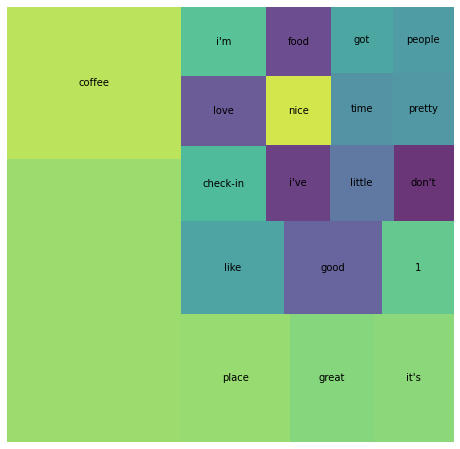

In [30]:
#count
wc_top20 = wc[wc['rank'] <= 20]
#plot
plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [31]:
shops['star_rating'].value_counts(normalize = True)

5.0    0.496324
4.0    0.309874
3.0    0.096901
2.0    0.060399
1.0    0.036502
Name: star_rating, dtype: float64

In [32]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ',"it's", '1', "i've", 'coffee', 'got', "place", "i'm", 'time', 'check-in', '-'])

tokens = []
for doc in tokenizer.pipe(shops['text_review'], batch_size=500):
    doc_tokens = []
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
150,great,2438,3250,1.0,0.008826,0.008826,0.320116
183,like,2034,2902,2.0,0.007881,0.016707,0.267069
176,good,2084,2779,3.0,0.007547,0.024254,0.273634
23,love,1434,1806,4.0,0.004905,0.029159,0.188288
783,little,1230,1479,5.0,0.004017,0.033176,0.161502


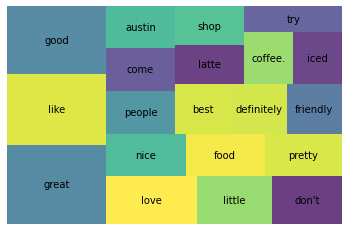

In [33]:
# Visualize again
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [34]:
shops[shops['star_rating'] >=4]

,coffee_shop_name,star_rating,date_of_review,text_review,base_tokens,spaCy_tokens,spaCy_tokens_v2,tokens
0,The Factory - Cafe With a Soul,5.0,11/25/2016,1 check-in Love love loved the atmosphere! Eve...,"[1, checkin, love, love, loved, the, atmospher...","[1, check-in, Love, love, loved, the, atmosphe...","[1, check-in, love, love, loved, atmosphere!, ...","[love, love, loved, atmosphere!, corner, shop,..."
1,The Factory - Cafe With a Soul,4.0,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...","[listed, in, date, night, austin, ambiance, in...","[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust...","[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,4.0,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, check-in, Listed, in, Brunch, Spots, I, lo...","[1, check-in, listed, brunch, spots, loved, ec...","[listed, brunch, spots, loved, eclectic, homey..."
4,The Factory - Cafe With a Soul,4.0,12/3/2016,1 check-in They are located within the Northcr...,"[1, checkin, they, are, located, within, the, ...","[1, check-in, They, are, located, within, the,...","[1, check-in, located, northcross, mall, shopp...","[located, northcross, mall, shopping, center, ..."
5,The Factory - Cafe With a Soul,4.0,11/20/2016,1 check-in Very cute cafe! I think from the mo...,"[1, checkin, very, cute, cafe, i, think, from,...","[1, check-in, Very, cute, cafe!, I, think, fro...","[1, check-in, cute, cafe!, think, moment, step...","[cute, cafe!, think, moment, stepped, in,, was..."
...,...,...,...,...,...,...,...,...
7610,The Steeping Room,5.0,3/1/2016,Great food! I haven't had a meal I did not enj...,"[great, food, i, havent, had, a, meal, i, did,...","[Great, food!, I, haven't, had, a, meal, I, di...","[great, food!, haven't, meal, enjoy, here., it...","[great, food!, haven't, meal, enjoy, here., cl..."
7611,The Steeping Room,4.0,2/19/2015,I actually step into this restaurant by chance...,"[i, actually, step, into, this, restaurant, by...","[I, actually, step, into, this, restaurant, by...","[actually, step, restaurant, chance, favorites...","[actually, step, restaurant, chance, favorites..."
7612,The Steeping Room,5.0,1/21/2016,"Ok, The Steeping Room IS awesome. How do they ...","[ok, the, steeping, room, is, awesome, how, do...","[Ok,, The, Steeping, Room, IS, awesome., How, ...","[ok,, steeping, room, awesome., great, menu, i...","[ok,, steeping, room, awesome., great, menu, i..."
7613,The Steeping Room,4.0,4/30/2015,"Loved coming here for tea, and the atmosphere ...","[loved, coming, here, for, tea, and, the, atmo...","[Loved, coming, here, for, tea,, and, the, atm...","[loved, coming, tea,, atmosphere, pretty, fres...","[loved, coming, tea,, atmosphere, pretty, fres..."


In [35]:
shops[shops['star_rating'] <=3]

,coffee_shop_name,star_rating,date_of_review,text_review,base_tokens,spaCy_tokens,spaCy_tokens_v2,tokens
3,The Factory - Cafe With a Soul,2.0,11/25/2016,Very cool decor! Good drinks Nice seating How...,"[very, cool, decor, good, drinks, nice, seatin...","[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ,...","[cool, decor!, good, drinks, nice, seating, ho..."
8,The Factory - Cafe With a Soul,3.0,10/25/2016,"1 check-in Ok, let's try this approach... Pro...","[1, checkin, ok, lets, try, this, approach, pr...","[1, check-in, Ok,, let's, try, this, approach....","[1, check-in, ok,, let's, try, approach..., ,...","[ok,, let's, try, approach..., pros:, music, s..."
11,The Factory - Cafe With a Soul,3.0,11/20/2016,"The store has A+ decoration, but honestly, the...","[the, store, has, a, decoration, but, honestly...","[The, store, has, A+, decoration,, but, honest...","[store, a+, decoration,, honestly,, coffee, go...","[store, a+, decoration,, honestly,, good, shop..."
12,The Factory - Cafe With a Soul,3.0,11/17/2016,1 check-in Listed in 2016 - The Third Time is ...,"[1, checkin, listed, in, 2016, the, third, tim...","[1, check-in, Listed, in, 2016, -, The, Third,...","[1, check-in, listed, 2016, time, charm!, fact...","[listed, 2016, charm!, factory, a+, decor, inn..."
25,The Factory - Cafe With a Soul,1.0,12/2/2016,"Okay, so after visiting my friends in LA and t...","[okay, so, after, visiting, my, friends, in, l...","[Okay,, so, after, visiting, my, friends, in, ...","[okay,, visiting, friends, la, trying, mint, m...","[okay,, visiting, friends, la, trying, mint, m..."
...,...,...,...,...,...,...,...,...
7582,The Steeping Room,3.0,8/21/2014,"I should probably give this spot 4 stars, but ...","[i, should, probably, give, this, spot, 4, sta...","[I, should, probably, give, this, spot, 4, sta...","[probably, spot, 4, stars,, main, dish, underw...","[probably, spot, 4, stars,, main, dish, underw..."
7583,The Steeping Room,2.0,9/13/2015,"It's a lovely little tea and pastry shop, but ...","[its, a, lovely, little, tea, and, pastry, sho...","[It's, a, lovely, little, tea, and, pastry, sh...","[it's, lovely, little, tea, pastry, shop,, ser...","[lovely, little, tea, pastry, shop,, service, ..."
7590,The Steeping Room,3.0,1/15/2015,So today I tried this place. I have been in Au...,"[so, today, i, tried, this, place, i, have, be...","[So, today, I, tried, this, place., I, have, b...","[today, tried, place., austin, september, list...","[today, tried, place., austin, september, list..."
7600,The Steeping Room,2.0,5/10/2015,Great service with unimaginative and uneventfu...,"[great, service, with, unimaginative, and, une...","[Great, service, with, unimaginative, and, une...","[great, service, unimaginative, uneventful, fo...","[great, service, unimaginative, uneventful, fo..."


In [47]:
#make a new column named good_rating with 1 for ratings 4 or 5, and a 0 for ratings between 1-3.
shops['good_rating'] = [1 if x >= 4 else 0 for x in shops['star_rating']]
shops.sample(5)

,coffee_shop_name,star_rating,date_of_review,text_review,base_tokens,spaCy_tokens,spaCy_tokens_v2,tokens,good_rating
5716,Trianon Coffee,3.0,12/16/2011,3 check-ins My Monday morning stop for fresh r...,"[3, checkins, my, monday, morning, stop, for, ...","[3, check-ins, My, Monday, morning, stop, for,...","[3, check-ins, monday, morning, stop, fresh, r...","[3, check-ins, monday, morning, stop, fresh, r...",0
4790,Venezia Italian Gelato,5.0,7/17/2016,1 check-in The real deal traditional Italian g...,"[1, checkin, the, real, deal, traditional, ita...","[1, check-in, The, real, deal, traditional, It...","[1, check-in, real, deal, traditional, italian...","[real, deal, traditional, italian, gelato, aus...",1
5396,Cuvée Coffee Bar,5.0,2/8/2016,Cuvee is a wonderful place to enjoy some of th...,"[cuvee, is, a, wonderful, place, to, enjoy, so...","[Cuvee, is, a, wonderful, place, to, enjoy, so...","[cuvee, wonderful, place, enjoy, best, coffee,...","[cuvee, wonderful, enjoy, best, austin, offer,...",1
6937,La Patisserie,5.0,2/10/2016,everything about this place was great. the pe...,"[everything, about, this, place, was, great, t...","[everything, about, this, place, was, great., ...","[place, great., , person, helped, nice., , b...","[great., person, helped, nice., bought, couple...",1
2652,Third Coast Coffee Roasting Company,5.0,2/6/2014,"I love Third Coast. They're the best neighbor,...","[i, love, third, coast, theyre, the, best, nei...","[I, love, Third, Coast., They're, the, best, n...","[love, coast., they're, best, neighbor,, ever....","[love, coast., they're, best, neighbor,, ever....",1


In [48]:
good_shops = shops[shops['good_rating'] ==1]
bad_shops = shops[shops['good_rating'] ==0]
good_shops.shape, bad_shops.shape

((6140, 9), (1476, 9))

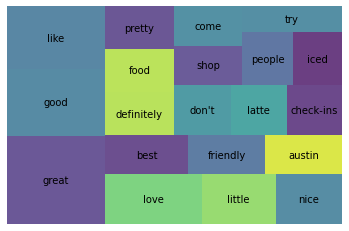

In [49]:
# Visualize top words for 'good shops'
wc = count(good_shops['tokens'])
wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

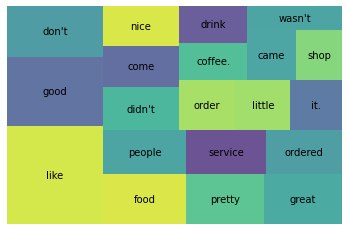

In [50]:
# Visualize top words for 'bad shops'
wc = count(bad_shops['tokens'])
wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [54]:
wc.tail(20)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
15576,"eating,",1,1,15588.0,0.000012,0.999768,0.000678
15584,"fuel,",1,1,15589.0,0.000012,0.999780,0.000678
15577,"taste"".",1,1,15590.0,0.000012,0.999792,0.000678
15586,counter;,1,1,15591.0,0.000012,0.999805,0.000678
15580,ravi,1,1,15592.0,0.000012,0.999817,0.000678
15603,uneventful,1,1,15593.0,0.000012,0.999829,0.000678
15604,pre-bought.,1,1,15594.0,0.000012,0.999841,0.000678
15591,"nora,",1,1,15595.0,0.000012,0.999853,0.000678
15592,offsetting,1,1,15596.0,0.000012,0.999866,0.000678
15599,vibrant,1,1,15597.0,0.000012,0.999878,0.000678


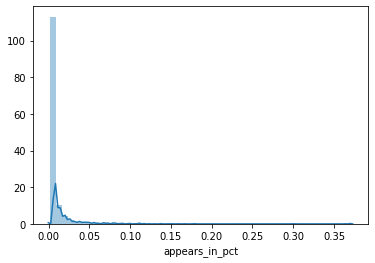

In [55]:
# Tree-Map w/ Words that appear in a least 0.1% of documents. 
wc = wc[wc['appears_in_pct'] >= 0.001]
sns.distplot(wc['appears_in_pct']);

In [56]:
wc.tail(5)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
15355,buddha,2,2,6667.0,0.000024,0.890669,0.001355
15362,hostess,2,2,6668.0,0.000024,0.890693,0.001355
15381,monte,2,2,6669.0,0.000024,0.890717,0.001355
15369,"turkey,",2,2,6670.0,0.000024,0.890742,0.001355
15450,"scone,",2,2,6673.0,0.000024,0.890815,0.001355


# LEMMATIZATION

In [57]:
# Wrap it all in a function
def get_lemmas(text):

    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [61]:
shops['lemmas'] = shops['text_review'].apply(get_lemmas)
shops['lemmas'].head()

0    [1, check, Love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, list, Brunch, Spots, love, eclectic...
3    [cool, decor, good, drink, nice, seating,  ,  ...
4    [1, check, locate, Northcross, mall, shopping,...
Name: lemmas, dtype: object

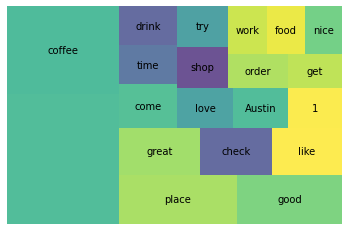

In [62]:
# Visualize the overall top words using lemmatization
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

# The plot
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [63]:
shops.head()

,coffee_shop_name,star_rating,date_of_review,text_review,base_tokens,spaCy_tokens,spaCy_tokens_v2,tokens,good_rating,lemmas
0,The Factory - Cafe With a Soul,5.0,11/25/2016,1 check-in Love love loved the atmosphere! Eve...,"[1, checkin, love, love, loved, the, atmospher...","[1, check-in, Love, love, loved, the, atmosphe...","[1, check-in, love, love, loved, atmosphere!, ...","[love, love, loved, atmosphere!, corner, shop,...",1,"[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,4.0,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...","[listed, in, date, night, austin, ambiance, in...","[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust...","[listed, date, night:, austin,, ambiance, aust...",1,"[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,4.0,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...,"[1, checkin, listed, in, brunch, spots, i, lov...","[1, check-in, Listed, in, Brunch, Spots, I, lo...","[1, check-in, listed, brunch, spots, loved, ec...","[listed, brunch, spots, loved, eclectic, homey...",1,"[1, check, list, Brunch, Spots, love, eclectic..."
3,The Factory - Cafe With a Soul,2.0,11/25/2016,Very cool decor! Good drinks Nice seating How...,"[very, cool, decor, good, drinks, nice, seatin...","[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ,...","[cool, decor!, good, drinks, nice, seating, ho...",0,"[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,4.0,12/3/2016,1 check-in They are located within the Northcr...,"[1, checkin, they, are, located, within, the, ...","[1, check-in, They, are, located, within, the,...","[1, check-in, located, northcross, mall, shopp...","[located, northcross, mall, shopping, center, ...",1,"[1, check, locate, Northcross, mall, shopping,..."


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [64]:
sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [66]:
from textblob import TextBlob

sentence = shops['text_review'].iloc[0]
print(sentence)
TextBlob(sentence).sentiment

1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 


Sentiment(polarity=0.5034722222222222, subjectivity=0.75)

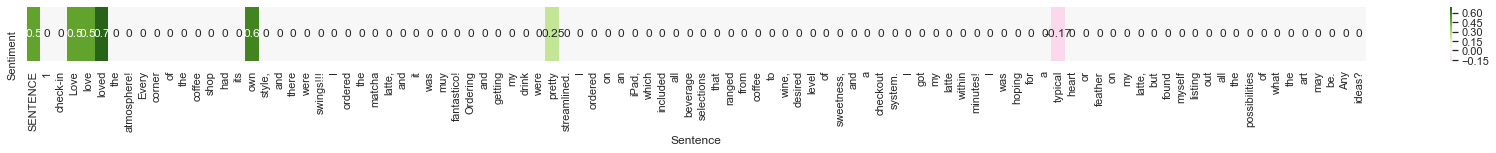

In [67]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
})

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

